***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dataset = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dataset

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
dataset.Renda.min()

0

In [ ]:
dataset.Renda.max()

200000

In [ ]:
classes = [ 0, 2*788, 5*788, 15*788, 25*788, 200000 ]

### 2º Definir os labels das classes

In [ ]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [ ]:
pd.cut(x = dataset.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [ ]:
frequencia = pd.value_counts(pd.cut(x = dataset.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True))

### 4º Construir a coluna de percentuais

In [ ]:
percentual = pd.value_counts(pd.cut(x = dataset.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True),
  normalize = True) *100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
dist_freq_Renda = pd.DataFrame({'Frequência': frequencia, 'Porcentagem': percentual})
dist_freq_Renda


,Frequência,Porcentagem
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

Text(0, 0.5, 'Frequência')

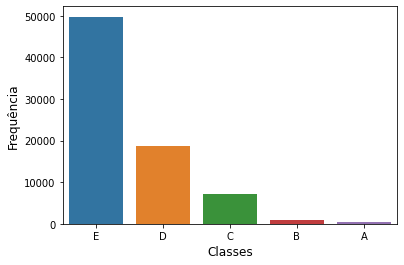

In [ ]:
tips = sns.load_dataset("tips")
ax = sns.barplot( x=labels , y = dist_freq_Renda.Frequência, data = tips, orient = 'v' )
ax.set_xlabel('Classes', fontsize=12) # Título eixo X
ax.set_ylabel('Frequência', fontsize=12)

> ### Conclusões

A maior parte das pessoas estão nas classes E e D. Majoritariamente na classe E.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [ ]:
dataset.head() # Idade, Anos de Estudo, Renda, Altura

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
dist_freq_Renda #Variavel Qtitativa 1

,Frequência,Porcentagem
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


In [ ]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


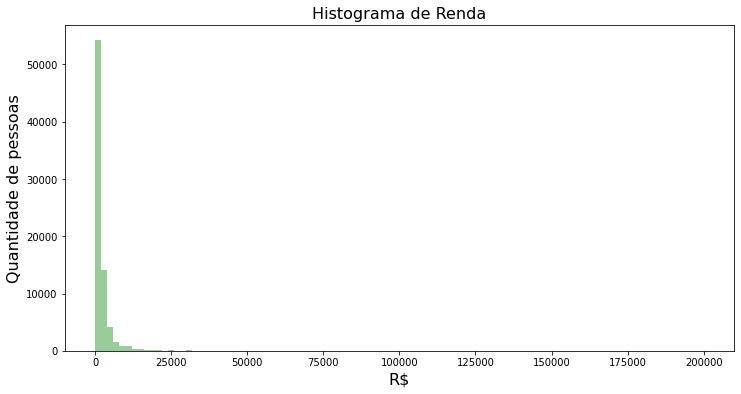

In [ ]:
ax = sns.distplot(dataset['Renda'], kde = False, label = 'Histograma de Renda', color= 'green', bins = 100)
ax.figure.set_size_inches(12, 6)
plt.title('Histograma de Renda', fontsize = 16)
plt.xlabel('R$', fontsize=16)
plt.ylabel('Quantidade de pessoas', fontsize=16)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


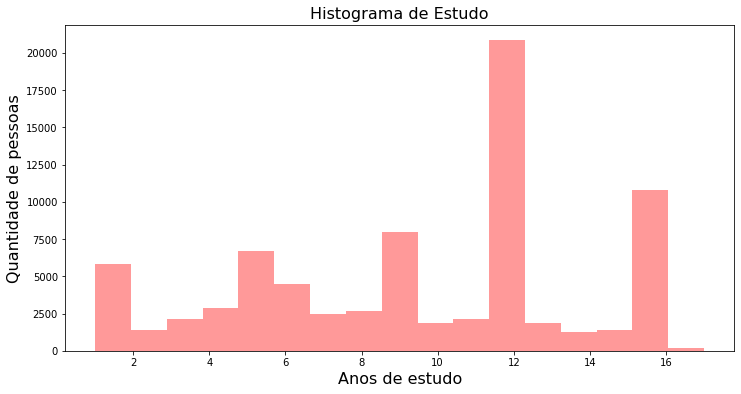

In [ ]:
ax = sns.distplot(dataset['Anos de Estudo'], kde = False, label = 'Histograma de Estudo', color= 'red', bins = 17)
ax.figure.set_size_inches(12, 6)
plt.title('Histograma de Estudo', fontsize = 16)
plt.xlabel('Anos de estudo', fontsize=16)
plt.ylabel('Quantidade de pessoas', fontsize=16)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


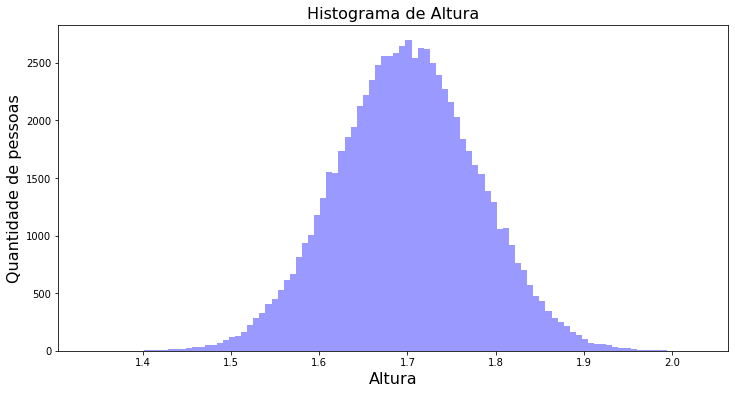

In [ ]:
ax = sns.distplot(dataset['Altura'], kde = False, label = 'Histograma de Estudo', color= 'blue', bins = 100)
ax.figure.set_size_inches(12, 6)
plt.title('Histograma de Altura', fontsize = 16)
plt.xlabel('Altura', fontsize=16)
plt.ylabel('Quantidade de pessoas', fontsize=16)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


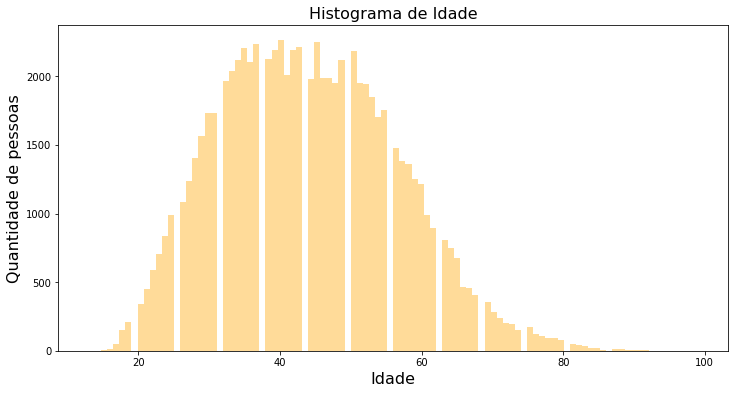

In [ ]:
ax = sns.distplot(dataset['Idade'], kde = False, label = 'Histograma de Estudo', color= 'orange', bins = 100)
ax.figure.set_size_inches(12, 6)
plt.title('Histograma de Idade', fontsize = 16)
plt.xlabel('Idade', fontsize=16)
plt.ylabel('Quantidade de pessoas', fontsize=16)
ax

> ### Conclusões

Renda = Assimétrica a direita . Mto provavelmente pq a maior parte das pessoas ganham em média um salario minimo.

Estudo = Assimetrica a esquerda. A maior parte das pessoas tem mais do que 10 anos de estudo.  O que puxa a curva para a esquerda.

Altura = Simétrica. Distribuição normal

Idade = Levemente assimetrica a direita. A maior parte das pessoas são mais jovens, entre 30 e 50 anos de idade. Provavelmente pq é a idade de pessoas que estão economicamente ativas ( são chefes de família).

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

In [ ]:
menores = dataset.query('Renda < 20000').Renda


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


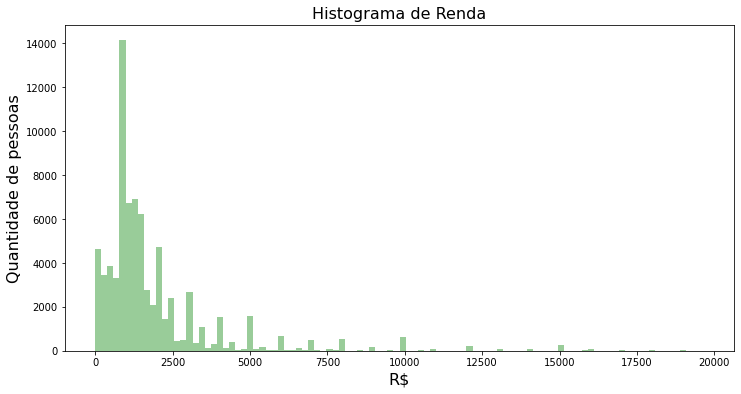

In [ ]:
ax = sns.distplot(menores, kde = False, label = 'Histograma de Renda', color= 'green', bins = 100)
ax.figure.set_size_inches(12, 6)
plt.title('Histograma de Renda', fontsize = 16)
plt.xlabel('R$', fontsize=16)
plt.ylabel('Quantidade de pessoas', fontsize=16)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [ ]:
dataset.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
frequencia = pd.crosstab(dataset.Sexo,
                         dataset.Cor,
                         )  # Dados em porcentagem
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
percentual = pd.crosstab(dataset.Sexo,
                         dataset.Cor,
                         normalize = True) * 100 # Dados em porcentagem
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

existem mto mais pessoas pardas, seguido por brancas, pretas, indigenas e amarela. E a maior parte do sexo masculino.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [ ]:
dataset.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [ ]:
dataset.Renda.median()

1200.0

### Obtenha a moda

In [ ]:
dataset.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [ ]:
dataset.Renda.mad()


1526.4951371644931

### Obtenha a variância

In [ ]:
dataset.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [ ]:
dataset.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [ ]:
aggfunc = {'mean','median','max'}
dataset['Cor'].replace({ # Como mudar substituir dados especificos por outros - função replace
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'}, inplace = True)
junto = dataset.groupby(['Sexo','Cor']).Renda.agg(aggfunc)
junto.rename(index = sexo, inplace = True)

junto

max         mean  median
Sexo      Cor                                  
Masculino Amarela    50000  4758.251064  2800.0
          Branca    200000  2925.744435  1700.0
          Indígena   10000  1081.710938   797.5
          Parda     100000  1659.577425  1200.0
          Preta      50000  1603.861687  1200.0
Feminino  Amarela    20000  3027.341880  1500.0
          Branca    100000  2109.866750  1200.0
          Indígena  120000  2464.386139   788.0
          Parda      30000  1176.758516   800.0
          Preta      23000  1134.596400   800.0

> ### Conclusões

A média da renda dos homens nipo é mais alta apesar do valor  max ser menor do que homens brancos, o que justifica a mediana é mais alta. Indica uma maior homogeneidade dos dados em comparação com brancos

Homens brancos tem a segunda maior media e mediana e o valor max é mto mais alto, o que eleva mto a media, indicando que os valores são mto discrepantes. Sugeridno a presença de outliers.

Indigenas são os que ganaham menos, a mediana de negros é maior do que pardos indicando que apesar da media ser menor o valor medio é maior, ou seja, é mais homogeneo.

Mulheres ganham menos do que homens em todas as classes, mulheres brancas tem a maior média, e maiores salarios maximos. A mediana entretanto fica inferior a japonesas indicando que existe maior discrepancia no salario de mulheres brancas. As outras classes de mulheres tem medianas iguais porem as pardas tem maior valor max e consequetemente maiores medias.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [ ]:
aggfunc = {'mad','var','std'}
dataset['Cor'].replace({ # Como mudar substituir dados especificos por outros - função replace
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'}, inplace = True)
junto = dataset.groupby(['Sexo','Cor']).Renda.agg(aggfunc) # Da pra usar o crosstab tbm
junto.rename(index = sexo, inplace = True)

junto

var           std          mad
Sexo      Cor                                              
Masculino Amarela   3.295707e+07   5740.824820  3709.597211
          Branca    2.257002e+07   4750.791872  2261.012346
          Indígena  1.449841e+06   1204.093490   798.910889
          Parda     5.345747e+06   2312.087184  1125.827704
          Preta     3.749294e+06   1936.309271   975.602482
Feminino  Amarela   1.392166e+07   3731.173660  2549.146322
          Branca    1.056909e+07   3251.013154  1670.967106
          Indígena  1.429818e+08  11957.498292  3007.892952
          Parda     2.547960e+06   1596.233048   811.580946
          Preta     1.821960e+06   1349.799809   705.453357

In [ ]:
renda_dispersao_por_sexo_e_cor = pd.crosstab(dataset.Cor,
                                         dataset.Sexo,
                                         aggfunc = {'mad', 'var', 'std'},
                                         values = dataset.Renda).round(2)
renda_dispersao_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_dispersao_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_dispersao_por_sexo_e_cor

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06

> ### Conclusões
Homens - Amarelos e brancos tem menos hommogeneidades dos dados, a amplitude dos dados é mto alta.
Ja as amostras de mulheres e outras categorias de homens o desvio é menor o que indica uma maior homogenidade dos dados. Ou seja de maneira geral ganham menos.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

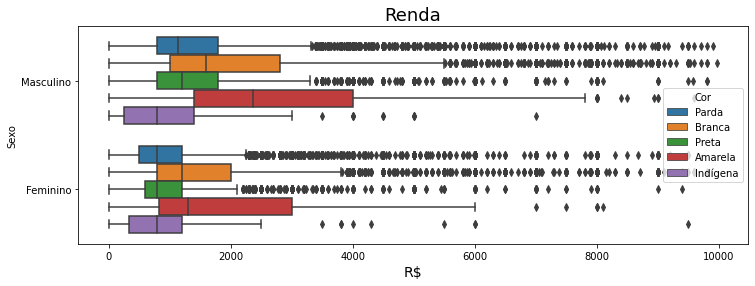

In [ ]:
dataset['Sexo'].replace({0: 'Masculino',
    1: 'Feminino'}, inplace = True)
ax = sns.boxplot( x = 'Renda', y = 'Sexo', hue = 'Cor', data = dataset.query('Renda < 10000'), orient = 'h') # Da pra ver que mulheres ganham menos que homens
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

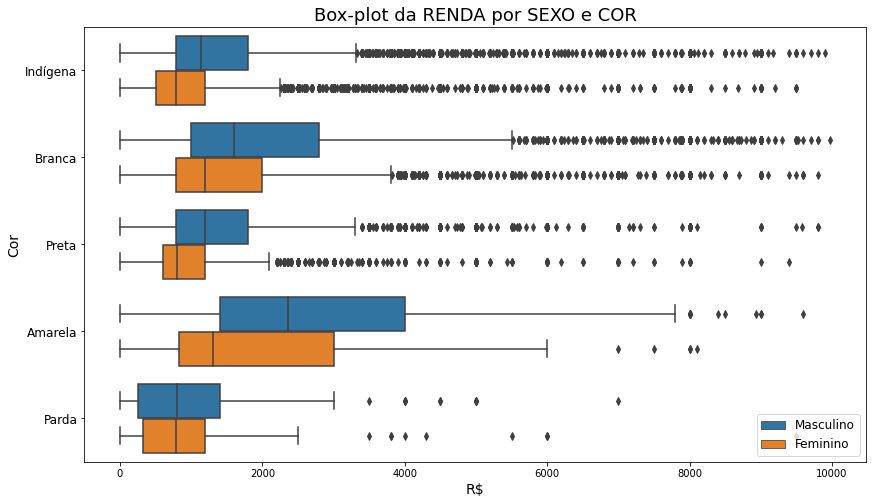

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dataset.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

A Apesar de todos os boxplot serem mais puxados para a direita, homens amarelos tendem a ser mais proximos do centro. Tanto a media qto a dispersão dos dados indicam um salário maior. Isto tbm ocorre qdo comparamos cores no sexo feminino para amarelo. Pessoas pretas e pardas tem uma districuição parecida e indigenas tendem a ganhar menos, são os que tem a curva mais acentuada para a direita. De maneira geral homens ganham mais do q mulheres. E pessoas brancas e amarelas ganham mais do que o restante.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

stats.percentileofscore(dataset.Renda, 788.0, kind='weak')

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
print(dataset.Renda.quantile(q=0.99))

15000.0


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
aggfunc = {'mean','median','max','std'}
dataset['Sexo'].replace({ # Como mudar substituir dados especificos por outros - função replace
    0: 'Masculino',
    1: 'Feminino'})
junto = dataset.groupby(['Anos de Estudo','Sexo']).Renda.agg(aggfunc)
junto.rename(index = anos_de_estudo, inplace = True)

junto

max  ...  median
Anos de Estudo                 Sexo               ...        
Sem instrução e menos de 1 ano Feminino    10000  ...     390
                               Masculino   30000  ...     700
1 ano                          Feminino     2000  ...     400
                               Masculino   30000  ...     788
2 anos                         Feminino     4000  ...     450
                               Masculino   40000  ...     788
3 anos                         Feminino     3500  ...     500
                               Masculino   80000  ...     800
4 anos                         Feminino    10000  ...     788
                               Masculino   50000  ...    1000
5 anos                         Feminino     8000  ...     788
                               Masculino   35000  ...    1045
6 anos                         Feminino     6000  ...     788
                               Masculino   25000  ...    1200
7 anos                         Feminino     9000  ...     788
                               Masculino   40000  ...    1200
8 anos                         Feminino    18000  ...     800
                               Masculino   30000  ...    1300
9 anos                         Feminino    20000  ...     788
                               Masculino   60000  ...    1200
10 anos                        Feminino     6000  ...     800
                               Masculino   45000  ...    1218
11 anos                        Feminino   100000  ...    1000
                               Masculino  200000  ...    1500
12 anos                        Feminino   120000  ...    1200
                               Masculino   30000  ...    1800
13 anos                        Feminino    20000  ...    1300
                               Masculino   25000  ...    2400
14 anos                        Feminino    20000  ...    1600
                               Masculino   50000  ...    2500
15 anos ou mais                Feminino   100000  ...    2800
                               Masculino  200000  ...    4000
Não determinados               Feminino     3000  ...     788
                               Masculino    7000  ...    1200

[34 rows x 4 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

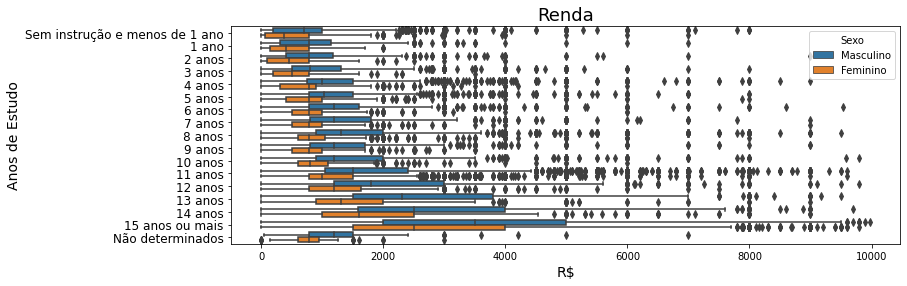

In [ ]:
ax = sns.boxplot( x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dataset.query('Renda < 10000'), orient = 'h') # Da pra ver que mulheres ganham menos que homens
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y
ax

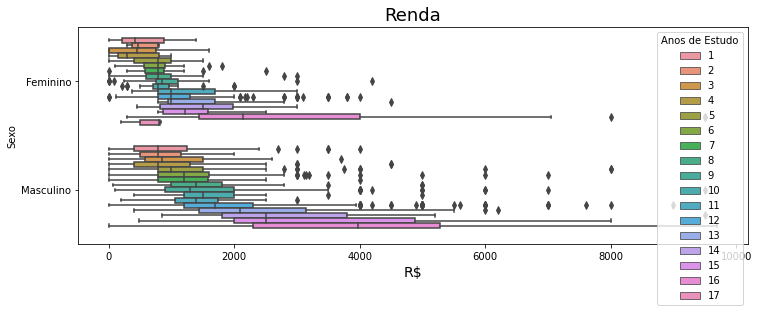

In [ ]:
dataset['Sexo'].replace({0: 'Masculino',
    1: 'Feminino'}, inplace = True)
ax = sns.boxplot( x = 'Renda', y = 'Sexo', hue = 'Anos de Estudo', data = dataset.query('Renda < 10000 and Idade == 40'), orient = 'h') # Da pra ver que mulheres ganham menos que homens
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

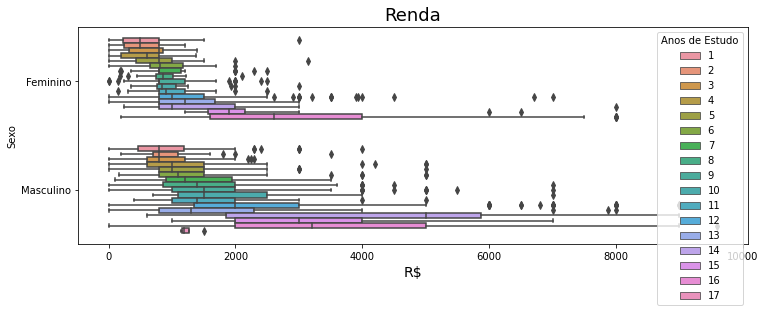

In [ ]:
dataset['Sexo'].replace({0: 'Masculino',
    1: 'Feminino'}, inplace = True)
ax = sns.boxplot( x = 'Renda', y = 'Sexo', hue = 'Anos de Estudo', data = dataset.query('Renda < 10000 and Idade == 50'), orient = 'h') # Da pra ver que mulheres ganham menos que homens
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

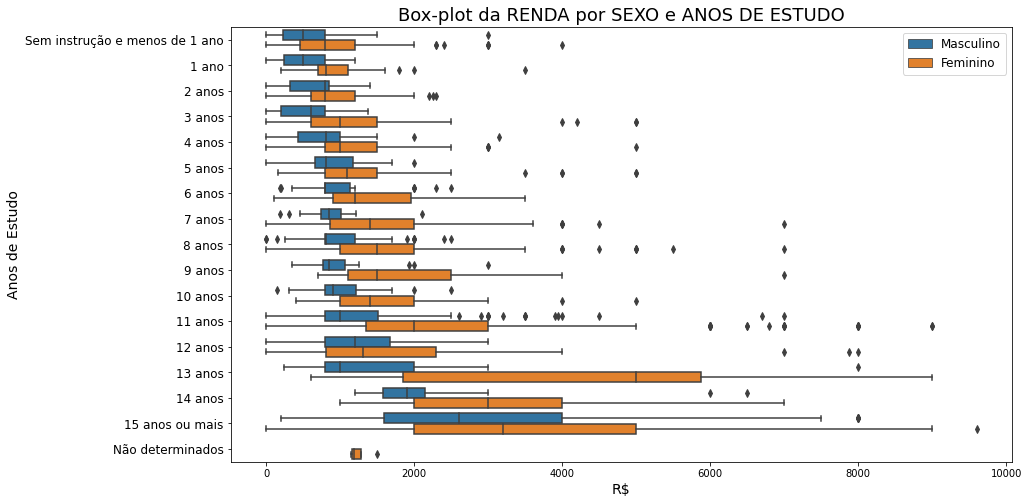

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=dataset.query('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

> ### Conclusões

Pessoas com 15 anos ou mais de estudo tendem a ganham mais, porém existe uma maior dispersão nos dados nesta categoria. Homens independente da faixa de estudo ganham mais q mulheres.

Idade - A idade tem influencia, homens a medida que a idade aumenta a dispersão dos dados a partir de 13 anos de estudo aumenta, aos 40 anos a mediana de quem estudou 15 anos ou mais ainda é a maior porém, aos 50 anos homens que estudaram em torno de 13 anos tem uma mediana maior do que os que estudaram mais. Para mulher isto não se observa.


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:

uf_renda=dataset.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
uf_renda.rename(index = uf, inplace = True)
uf_renda


Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

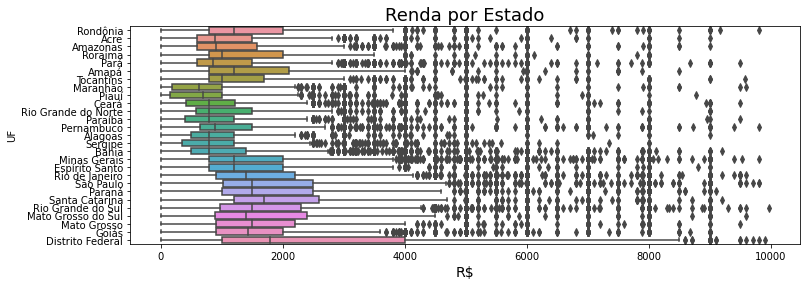

In [ ]:
dataset.replace({'UF': uf}, inplace = True)
ax = sns.boxplot( x = 'Renda', y = 'UF', data = dataset.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda por Estado', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões
Pessoas do DF tem uma mediana maior e uma maior dispersão dos dados. SC tbm é um estado com alta medaina com relação aos outros estados. Sergipe e Maranhão tem a menor mediana e os Estados do Nordeste a dispersão dos dados é menor e a mediana menor.